The mobility of an inclusion in a membrane was first determined by [Saffman and Delbruck](http://dx.doi.org/10.1073/pnas.72.8.3111).

$\displaystyle\frac{1}{\zeta} = \frac{1}{4\pi\eta_s}\left(\log\frac{\eta_s}{\mu a} - \gamma\right)$

In [32]:
EULER = 0.577

def saffman(eta, a=0.5e-6, mu=2e-3):
    return 1/(4*pi*eta)*(log(eta/(mu*a)) - EULER)

Saffman is invalid at low Bo. When $\log(\text{Bo}) < \gamma$, ($\text{Bo} \sim 1.7$) it gives $D < 0$. A more general form was worked out by Hughes and reduced to a nice closed form by [Petrov and Schwille](10.1529/biophysj.107.126565).

Define "reduced radius" (i.e., inverse Bossinesq number) $\epsilon = \displaystyle a\frac{\mu_1 + \mu_2}{\eta_s}$ where $\mu_1$ and $\mu_2$ are bulk viscosities of the subphase and superphase.


\begin{align}
\displaystyle\frac{1}{\zeta} &= \frac{1}{4\pi\eta_s}\\
    &\times\ \log(2/\epsilon) - \gamma + 4\epsilon/\pi - (\epsilon^2/2)\log(2/\epsilon)\\
&\times\ \left[1 - (\epsilon^2/\pi)\log(2/\epsilon) + c_1\epsilon^{b_1}/(1 + c_2\epsilon^{b_2})\right]^{-1}
\end{align}

In [27]:
C1 = 0.73761
B1 = 2.74819
C2 = 0.52119
B2 = 0.61465

def petrov(eta, a=0.5e-6, mu1=3e-3, mu2=1e-3):
    ep = a*(mu1 + mu2)/eta
    prefactor = 1/(4*pi*eta)
    factor1 = log(2/ep) - EULER + 4*ep/pi - ep**2/2*log(2/ep)
    factor2 = (1 - ep**2/pi*log(2/ep) + C1*ep**B1/(1 + C2*ep**B2))**-1
    return prefactor*factor1*factor2

[Fischer](http://dx.doi.org/10.1017/S002211200600022X)

Plotting $D = \displaystyle\frac{kT}{\zeta}$ vs. $\eta_s$ for

* $a=0.5\ \mu\text{m}$.
* $\mu_1 = 1\times10^{-3}\ \text{Pa}\cdot\text{s}$ (water).
* $\mu_2 = 3\times10^{-3}\ \text{Pa}\cdot\text{s}$ (hexadecane).

In [30]:
kT = 4.1e-21
eta = logspace(-10, -6)

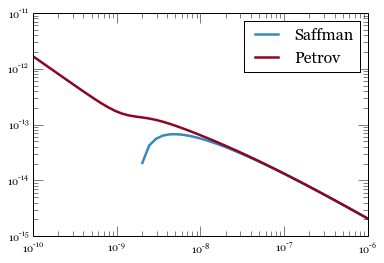

In [33]:
fig, ax = subplots()
ax.plot(eta, kT*saffman(eta), label='Saffman')
ax.plot(eta, kT*petrov(eta), label='Petrov')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='best')

In [25]:
mu=2e-3; a = 0.5e-6
exp(EULER), exp(EULER)*mu*a

(1.7806883445996129, 1.7806883445996127e-09)

This occurs at $\text{Bo} \sim 1.7$ which in our case corresponds to $\eta_s \sim 10^9$.